In [55]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

In [56]:
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [57]:
print(data.shape)

(1338, 7)


In [58]:
display(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [59]:
display(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Исследование данных.

Визуализируем числовые признаки

Text(0.5, 1.0, 'Медицинские расходы')

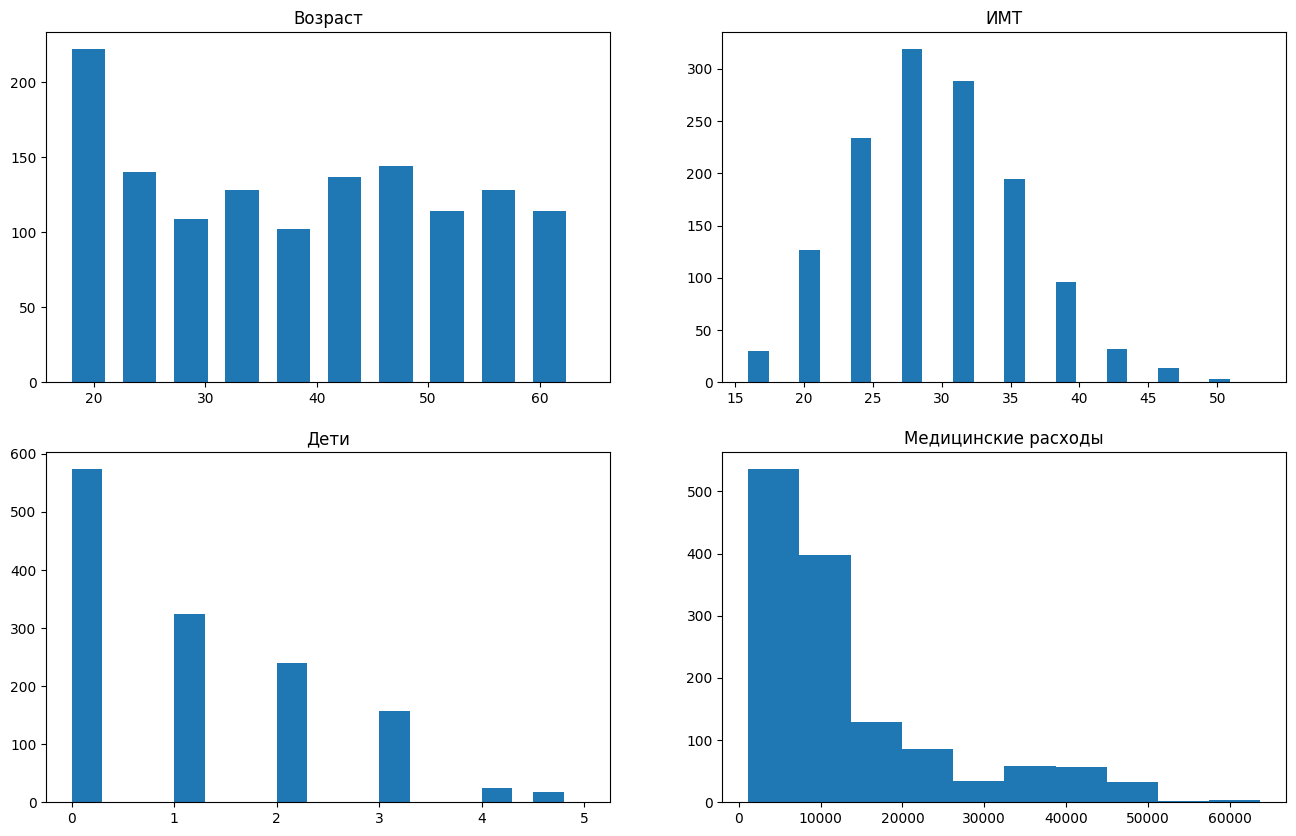

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Строим гистограмму для визуализации возраста
axes[0][0].hist(x=data['age'],
             width=3
            )
axes[0][0].set_title('Возраст')

# Строим гистограмму для визуализации возраста
axes[0][1].hist(x=data['bmi'],
             width=1.5
            )
axes[0][1].set_title('ИМТ')

# Строим гистограмму для визуализации возраста
axes[1][0].hist(x=data['children'],
             width=0.3
            )
axes[1][0].set_title('Дети')

# Строим гистограмму для визуализации возраста
axes[1][1].hist(x=data['charges']
            )
axes[1][1].set_title('Медицинские расходы')

Строим столбчатые диаграммы медианных медицинских расходов в зависимости от категориальных признаков и коробчатые диаграммы медицинских расходов в зависимости от категориальных признаков.

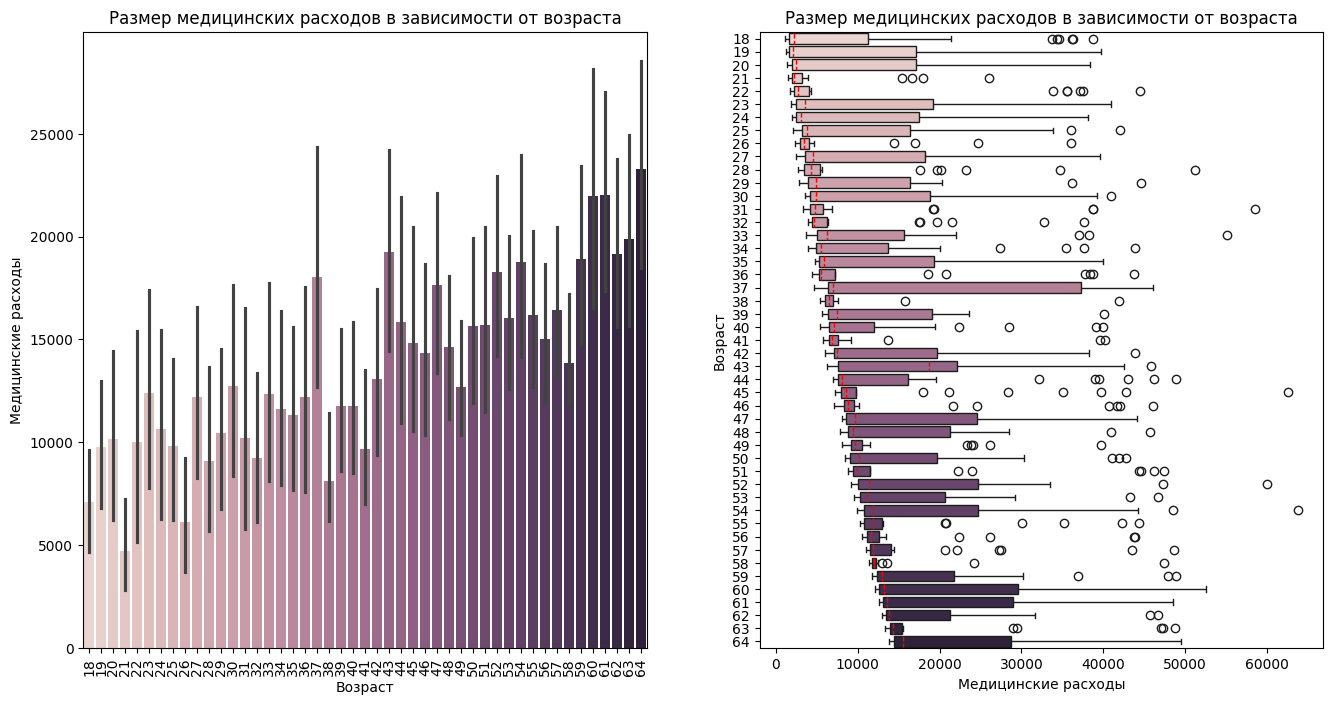

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Строим столбчатую диаграмму для визуализации размера медианных медицинских расходов в зависимости от возраста
sns.barplot(
            data, 
            x='age', 
            y='charges', 
            hue='age', 
            legend=False, 
            ax=axes[0]
            )
axes[0].set(xlabel='Возраст', ylabel='Медицинские расходы')
axes[0].xaxis.set_tick_params(rotation = 90)
axes[0].set_title('Размер медицинских расходов в зависимости от возраста')

# Строим коробчатую диаграмму для визуализации размера медицинских расходов в зависимости от возраста
sns.boxplot(
            data, 
            x='charges', 
            y='age', 
            orient='h', 
            hue='age',
            legend=False, 
            medianprops={"color": "red", "linestyle": '--'}
            )
axes[1].set(xlabel='Медицинские расходы', ylabel='Возраст')
axes[1].set_title('Размер медицинских расходов в зависимости от возраста')

plt.show()

In [62]:
bmi_data=data['bmi'].value_counts()
bmi_data

bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64

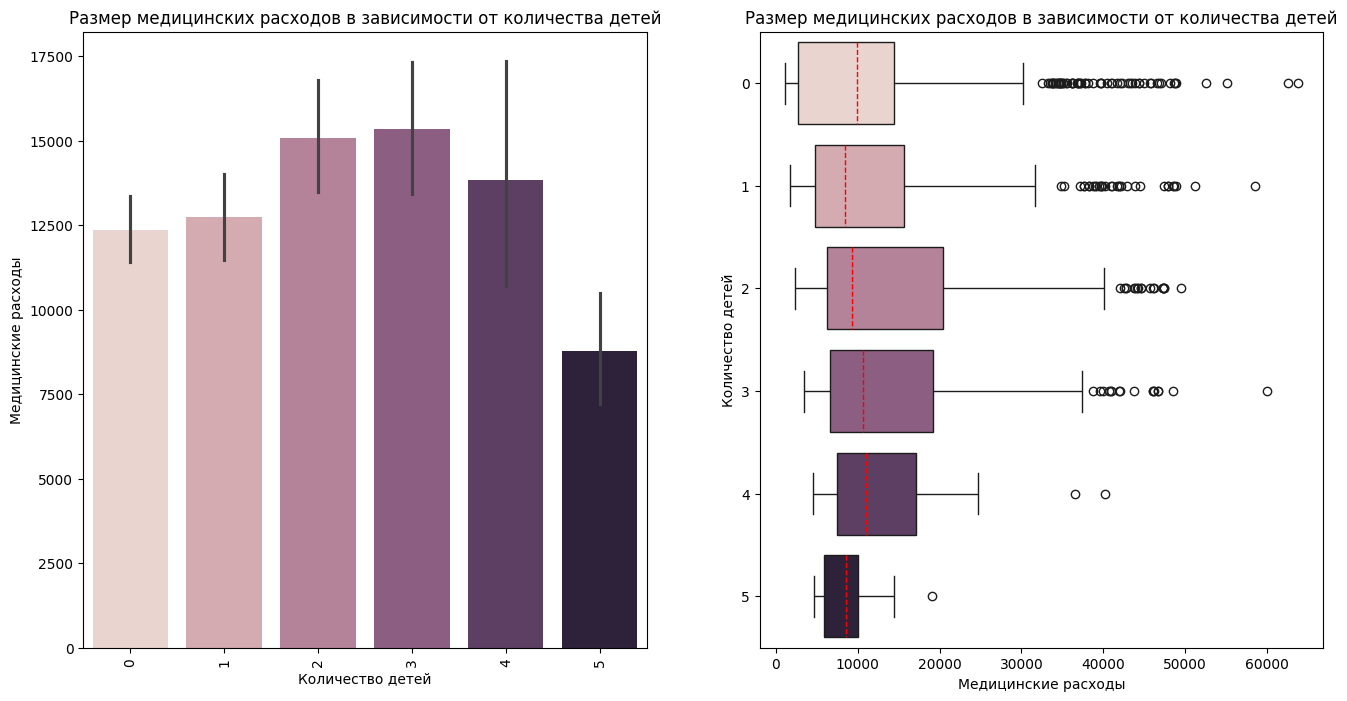

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Строим столбчатую диаграмму для визуализации размера медианных медицинских расходов в зависимости от количества детей
sns.barplot(
            data, 
            x='children', 
            y='charges', 
            hue='children', 
            legend=False, 
            ax=axes[0]
            )
axes[0].set(xlabel='Количество детей', ylabel='Медицинские расходы')
axes[0].xaxis.set_tick_params(rotation = 90)
axes[0].set_title('Размер медицинских расходов в зависимости от количества детей')

# Строим коробчатую диаграмму для визуализации размера медицинских расходов в количества детей
sns.boxplot(
            data, 
            x='charges', 
            y='children', 
            orient='h', 
            hue='children',
            legend=False, 
            medianprops={"color": "red", "linestyle": '--'}
            )
axes[1].set(xlabel='Медицинские расходы', ylabel='Количество детей')
axes[1].set_title('Размер медицинских расходов в зависимости от количества детей')

plt.show()

Строим диаграммы рассеяния зависимости целевого признака от других числовых в разрезе категориальных.

c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\relational.py:721: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


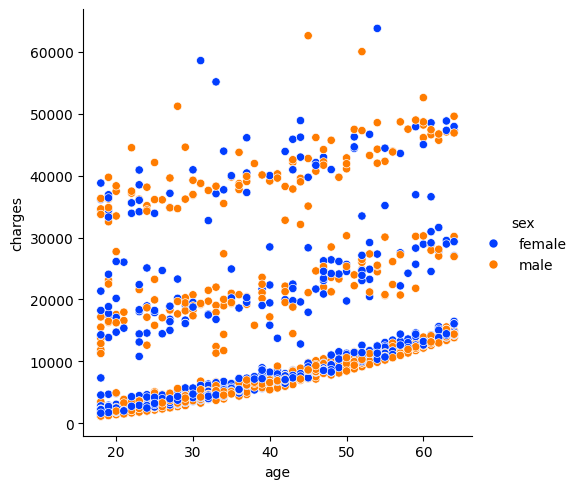

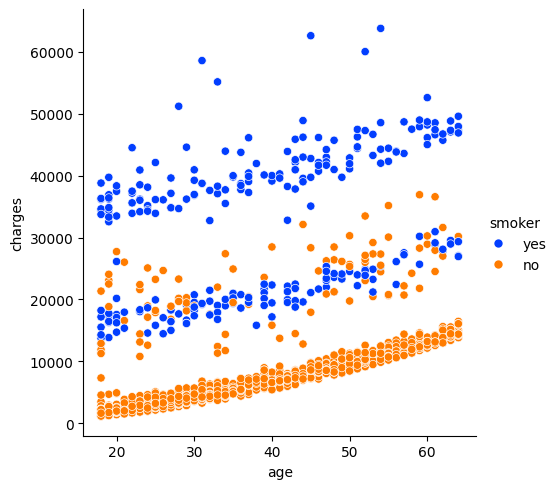

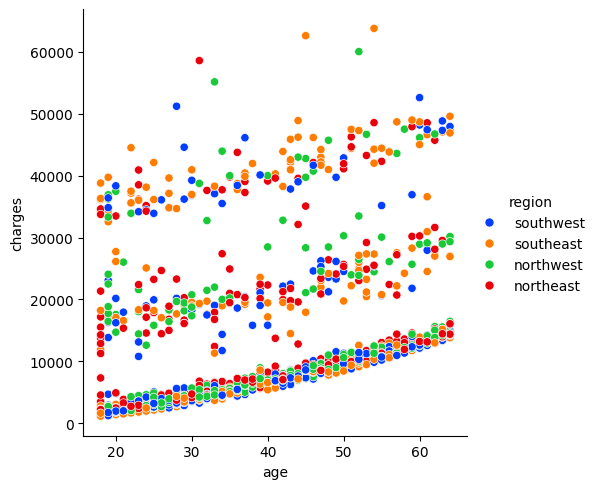

In [64]:
#fig, axes = plt.subplots(1, 3, figsize=(10, 5))

sns.relplot(
             x = 'age',
             y = 'charges',
             data = data,
             palette='bright',
             kind='scatter', 
             hue='sex',
             ax = axes[0]
            )
#axes[0].set(xlabel='Возраст', ylabel='Медицинские расходы')
#axes[0].set_title('Размер медицинских расходов в зависимости от возраста в разрезе пола')

sns.relplot(
             x = 'age',
             y = 'charges',
             data = data,
             palette='bright',
             kind='scatter', 
             hue='smoker'
            )
#axes[1].set(xlabel='Возраст', ylabel='Медицинские расходы')
#axes[1].set_title('Размер медицинских расходов в зависимости от возраста в разрезе отношения к курению')

sns.relplot(
             x = 'age',
             y = 'charges',
             data = data,
             palette='bright',
             kind='scatter', 
             hue='region'
            )
#axes[2].set(xlabel='Возраст', ylabel='Медицинские расходы')
#axes[2].set_title('Размер медицинских расходов в зависимости от возраста в разрезе региона проживания')

#plt.show()

c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\relational.py:721: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


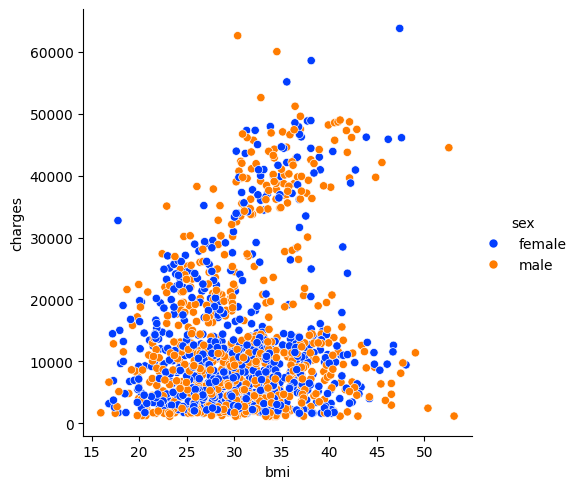

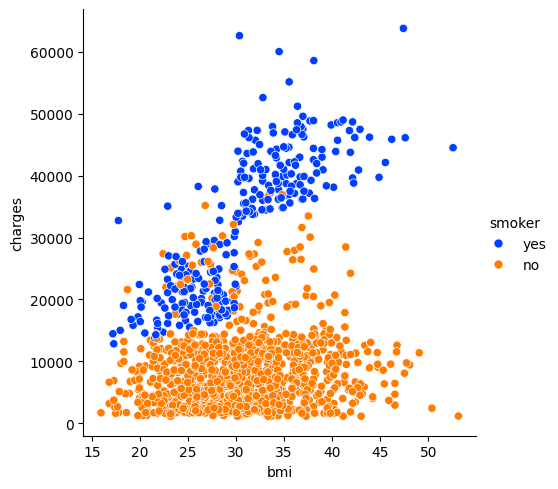

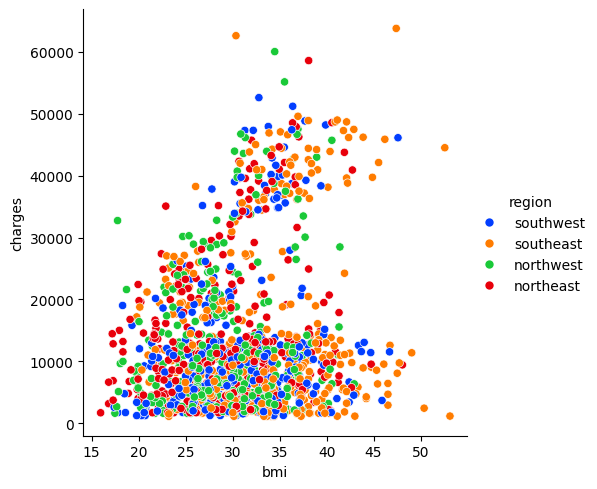

In [65]:
#fig, axes = plt.subplots(1, 3, figsize=(10, 5))

sns.relplot(
             x = 'bmi',
             y = 'charges',
             data = data,
             palette='bright',
             kind='scatter', 
             hue='sex',
             ax = axes[0]
            )
#axes[0].set(xlabel='Возраст', ylabel='Медицинские расходы')
#axes[0].set_title('Размер медицинских расходов в зависимости от возраста в разрезе пола')

sns.relplot(
             x = 'bmi',
             y = 'charges',
             data = data,
             palette='bright',
             kind='scatter', 
             hue='smoker'
            )
#axes[1].set(xlabel='Возраст', ylabel='Медицинские расходы')
#axes[1].set_title('Размер медицинских расходов в зависимости от возраста в разрезе отношения к курению')

sns.relplot(
             x = 'bmi',
             y = 'charges',
             data = data,
             palette='bright',
             kind='scatter', 
             hue='region'
            )
#axes[2].set(xlabel='Возраст', ylabel='Медицинские расходы')
#axes[2].set_title('Размер медицинских расходов в зависимости от возраста в разрезе региона проживания')

#plt.show()

c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\relational.py:721: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


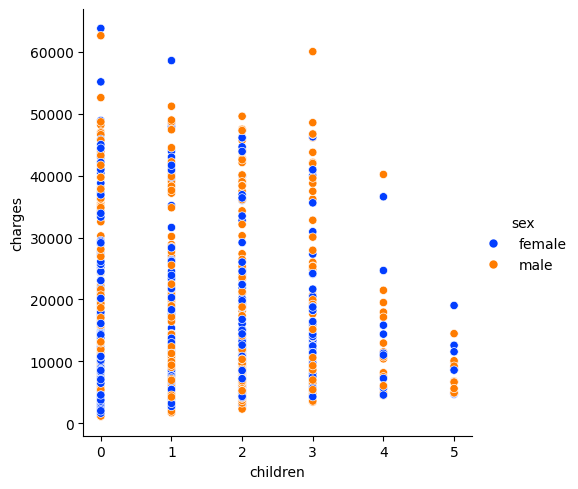

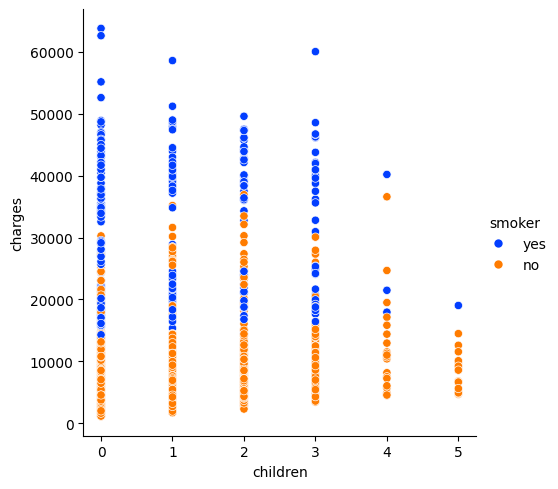

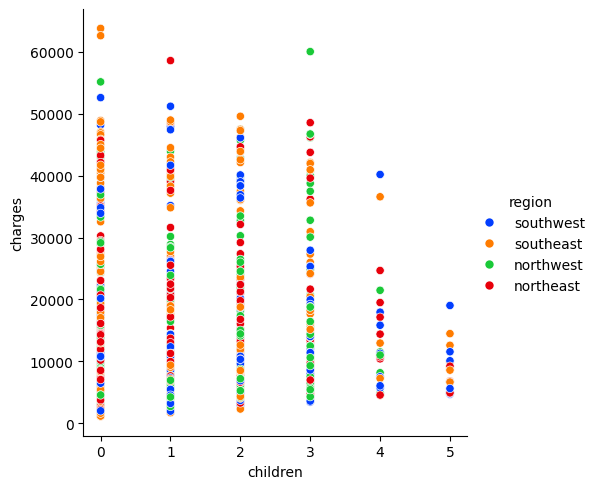

In [66]:
#fig, axes = plt.subplots(1, 3, figsize=(10, 5))

sns.relplot(
             x = 'children',
             y = 'charges',
             data = data,
             palette='bright',
             kind='scatter', 
             hue='sex',
             ax = axes[0]
            )
#axes[0].set(xlabel='Возраст', ylabel='Медицинские расходы')
#axes[0].set_title('Размер медицинских расходов в зависимости от возраста в разрезе пола')

sns.relplot(
             x = 'children',
             y = 'charges',
             data = data,
             palette='bright',
             kind='scatter', 
             hue='smoker'
            )
#axes[1].set(xlabel='Возраст', ylabel='Медицинские расходы')
#axes[1].set_title('Размер медицинских расходов в зависимости от возраста в разрезе отношения к курению')

sns.relplot(
             x = 'children',
             y = 'charges',
             data = data,
             palette='bright',
             kind='scatter', 
             hue='region'
            )
#axes[2].set(xlabel='Возраст', ylabel='Медицинские расходы')
#axes[2].set_title('Размер медицинских расходов в зависимости от возраста в разрезе региона проживания')

#plt.show()

# Подготовка данных

In [67]:
import category_encoders as ce

In [68]:
#кодируем бинарные категориальные признаки
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
#data = pd.get_dummies(data)
encoder = ce.OneHotEncoder(cols=['region'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(data['region'])
data = pd.concat([data, type_bin], axis=1)
data = data.drop('region', axis=1)
data.head()

,age,sex,bmi,children,smoker,charges,region_southwest,region_southeast,region_northwest,region_northeast
0,19,0,27.900,0,1,16884.92400,1,0,0,0
1,18,1,33.770,1,0,1725.55230,0,1,0,0
2,28,1,33.000,3,0,4449.46200,0,1,0,0
3,33,1,22.705,0,0,21984.47061,0,0,1,0
4,32,1,28.880,0,0,3866.85520,0,0,1,0


Выделим факторы и целевой признак в отдельные таблицы:

In [69]:
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

Разделим набор данных на тренировочную и тестовую выборки в соотношении 80/20

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.shape

(268, 9)

# Обучение модели

In [71]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
print('w0:{}'.format(lr_model.intercept_))

w0:-12390.804294570275


In [73]:
y_train_predict = lr_model.predict(X_train)
y_test_predict = lr_model.predict(X_test)

In [75]:
print('R2 score: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
print('MAE score: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
print('MAE score: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
print('MAPE score: {:.3f}%'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
print('MAPE score: {:.3f}%'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

R2 score: 0.742
R2 score: 0.784
MAE score: 4208.235
MAE score: 4181.194
MAPE score: 42.203%
MAPE score: 46.888%


Text(0, 0.5, 'Модель')

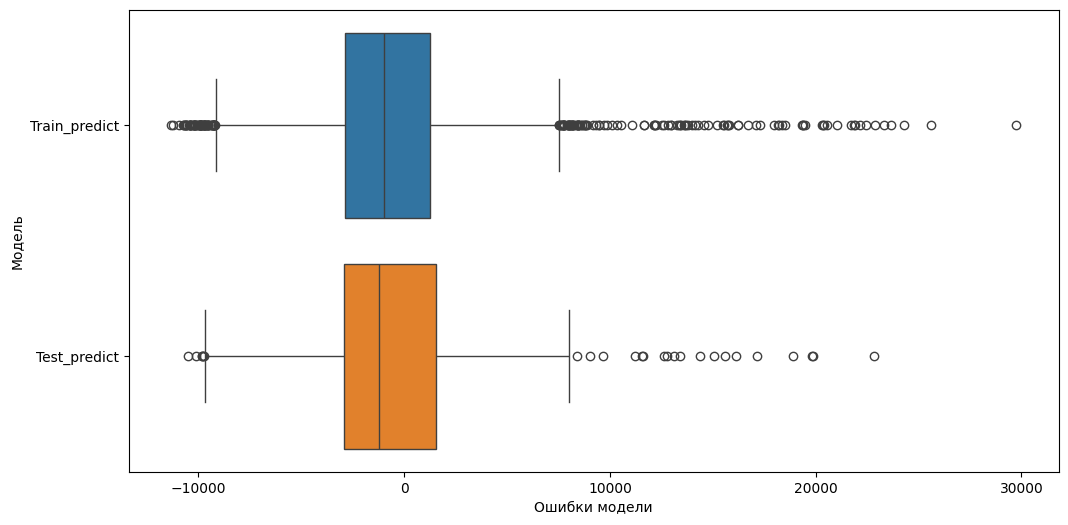

In [78]:
fig, ax = plt.subplots(figsize=(12,6))
y_error_train = y_train - lr_model.predict(X_train)
y_error_test = y_test - lr_model.predict(X_test)
errors_df = pd.DataFrame({'Train_predict': y_error_train, 'Test_predict': y_error_test})
sns.boxplot(data = errors_df, orient='h', ax=ax)
ax.set_xlabel('Ошибки модели')
ax.set_ylabel('Модель')

In [79]:
#Создаем объект для min-max нормализации
scaler = preprocessing.MinMaxScaler()
#Вычисляем параметры для нормализации - min и max для каждого столбца
scaler.fit(X_train)
#Производим преобразование для каждой из выборок
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
x_train_poly = poly.transform(X_train_scaled)
x_test_poly = poly.transform(X_test_scaled)
x_train_poly.shape
x_test_poly.shape

(268, 54)

In [85]:
lr_model = linear_model.LinearRegression()
lr_model.fit(x_train_poly, y_train)
y_train_predict_poly = lr_model.predict(x_train_poly)
y_test_predict_poly = lr_model.predict(x_test_poly)
print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_poly)))


R2 score: 0.867


In [86]:
print('w1:{}'.format(lr_model.coef_))

w1:[-3.72151953e+16  2.22675411e+16  4.87325093e+15 -5.34858429e+15
 -3.80634796e+13 -1.32131501e+15 -3.86229127e+15 -4.55338688e+15
 -9.04883274e+13  8.42400000e+03  7.92000000e+02  1.08200000e+03
 -1.64000000e+03  1.50000000e+02  3.72151953e+16  3.72151953e+16
  3.72151953e+16  3.72151953e+16 -1.70962690e+16  6.47250000e+02
 -1.22562500e+03  2.56000000e+02 -5.17127210e+15 -5.17127210e+15
 -5.17127210e+15 -5.17127210e+15 -9.72437500e+03  1.56128125e+03
  5.48312188e+04 -4.87325093e+15 -4.87325093e+15 -4.87325092e+15
 -4.87325092e+15 -2.09000000e+03 -2.23550000e+03  5.34858429e+15
  5.34858429e+15  5.34858429e+15  5.34858429e+15 -1.57066944e+14
  1.95130423e+14  1.95130423e+14  1.95130423e+14  1.95130423e+14
 -6.15837637e+15  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.61740011e+15  0.00000000e+00  0.00000000e+00 -2.92630449e+15
  0.00000000e+00 -7.38920305e+15]


In [87]:
lasso_lr_poly = linear_model.Lasso(max_iter=2000)
lasso_lr_poly.fit(x_train_poly, y_train)
y_train_predict_lasso = lasso_lr_poly.predict(x_train_poly)
y_test_predict_lasso = lasso_lr_poly.predict(x_test_poly)

In [88]:
print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_lasso)))
print('MAE score: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict_lasso)))
print('MAPE score: {:.3f}%'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict_lasso)*100))

R2 score: 0.867
MAE score: 2719.329
MAPE score: 30.070%


In [91]:
ridge_lr_poly = linear_model.Ridge()
ridge_lr_poly.fit(x_train_poly, y_train)
y_train_predict_ridge = ridge_lr_poly.predict(x_train_poly)
y_test_predict_ridge = ridge_lr_poly.predict(x_test_poly)

In [92]:
print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_ridge)))
print('MAE score: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict_ridge)))
print('MAPE score: {:.3f}%'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict_ridge)*100))

R2 score: 0.863
MAE score: 2860.555
MAPE score: 31.380%
